Today, we're going to do regression in (hopefully) two ways.

First we need some data, so let's load a synthetic data file.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../sample_data/test_data.csv')
print df.head()

   category  feature_one  feature_two  feature_three  noise  value
0         1          6.2          1.3            1.9   0.03   9.43
1         1          6.3          1.8            1.6   0.05   9.75
2         1          5.5          1.4            1.4  -0.02   8.28
3         2          6.3          1.4            1.7  -0.05   9.35
4         2          6.5          2.0            1.6   0.06  10.16


I know that I made this synthetic data set where value was a function of feature__{1,2,3} to which I added noise.  

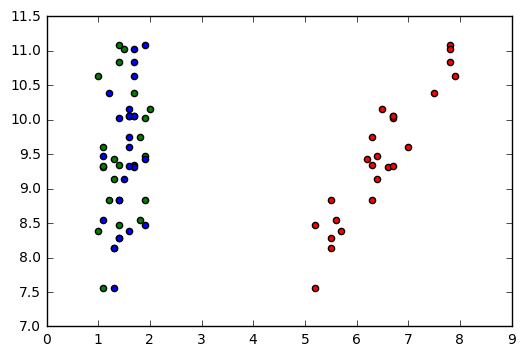

Index([u'feature_one', u'feature_two', u'feature_three'], dtype='object')

In [87]:
for column, color in zip(df.columns[1:4], ('r','g','b')):    
    plt.scatter(df[column], df.value, c=color)
plt.show()

The red trend (feature_one) seems to have the strongest correlation with value, and the relationship looks pretty linear.  Let's fit a line to just the red data and see what python says about the relationship.

In [88]:
import sklearn.linear_model as lm

ols = lm.LinearRegression()
model = ols.fit(df['feature_one'].values.reshape(-1, 1), df['value'])
print [model.intercept_], model.coef_

[2.5570368214233739] [ 1.06788677]


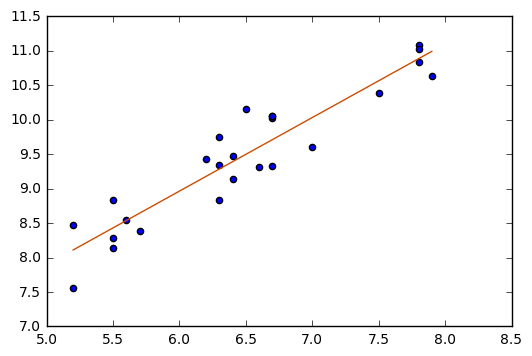

In [89]:
def f(x, intercept, coefs):
    return sum(x*coefs) + intercept

x_test = sorted(df['feature_one'])
y_pred = map(lambda x: f(x, model.intercept_, model.coef_), x_test)

plt.plot(x_test, y_pred, c=(0.8, 0.3, 0.0))
plt.scatter(df['feature_one'], df['value'])
plt.show()

I don't like the weird .values.reshape(-1,1) thing either.  There are two ways to get around this, but first, let's see what it does.

In [90]:
print df['feature_one'].values

print df['feature_one'].values.reshape(-1, 1)

[ 6.2  6.3  5.5  6.3  6.5  6.7  6.3  5.2  5.5  5.6  7.5  6.7  7.8  5.5  6.7
  7.   7.8  6.6  6.7  7.8  5.7  5.2  6.4  7.9  6.4]
[[ 6.2]
 [ 6.3]
 [ 5.5]
 [ 6.3]
 [ 6.5]
 [ 6.7]
 [ 6.3]
 [ 5.2]
 [ 5.5]
 [ 5.6]
 [ 7.5]
 [ 6.7]
 [ 7.8]
 [ 5.5]
 [ 6.7]
 [ 7. ]
 [ 7.8]
 [ 6.6]
 [ 6.7]
 [ 7.8]
 [ 5.7]
 [ 5.2]
 [ 6.4]
 [ 7.9]
 [ 6.4]]


It just turns a row vector into a column vector, so each entry in the original vector are treated as a separate row / separate point to fit to our line.  This is NOT necessary if we are fitting more than one feature.

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


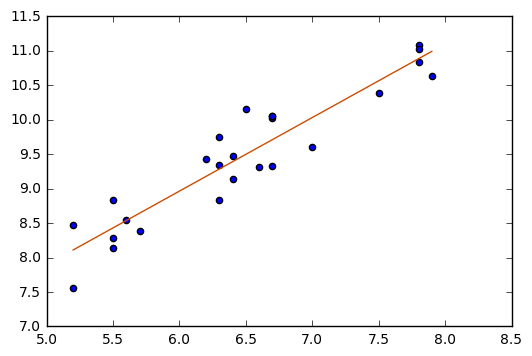

In [91]:
# Sorting but keeping it in an numpy array
x_test = df['feature_one'].copy()
x_test.sort()
y_pred = map(model.predict, x_test)

plt.plot(x_test, y_pred, c=(0.8, 0.3, 0.0))
plt.scatter(df['feature_one'], df['value'])
plt.show()

Let's fit it for all three features.

5.58205702478 [ 0.59013765  0.04612402  0.        ]


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


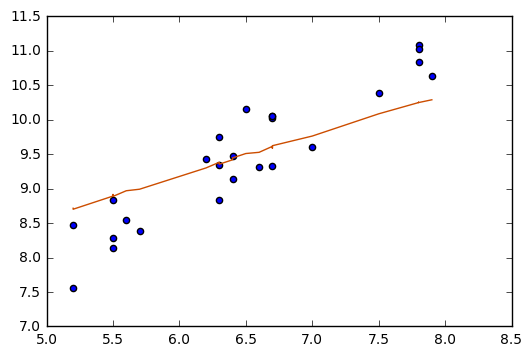

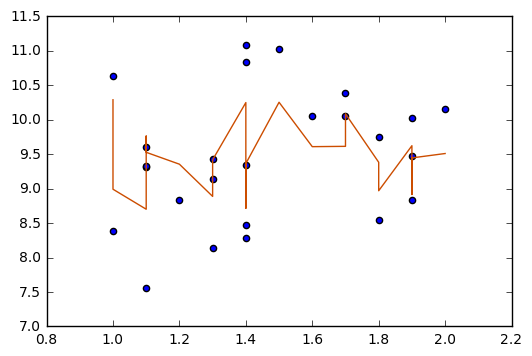

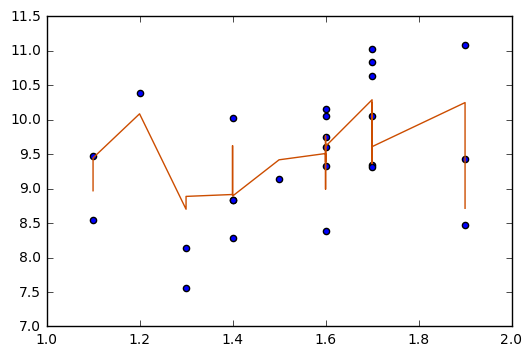

In [92]:
elastic = lm.ElasticNet(fit_intercept=True, alpha=0.5, l1_ratio=0.1)
X = df[['feature_one', 'feature_two', 'feature_three']]
y = df['value']
model = elastic.fit(X, y)
print model.intercept_, model.coef_

X = X.sort(columns='feature_one')
y_pred = model.predict(X.as_matrix())

for feature in ['feature_one', 'feature_two', 'feature_three']:
    X = X.sort(columns=feature)
    y_pred = model.predict(X.as_matrix())
    plt.plot(X[feature], y_pred, c=(0.8, 0.3, 0.0))
    plt.scatter(df[feature], df['value'])
    plt.show()

In [93]:
print X
print X.as_matrix()

    feature_one  feature_two  feature_three
9           5.6          1.8            1.1
22          6.4          1.9            1.1
10          7.5          1.7            1.2
7           5.2          1.1            1.3
13          5.5          1.3            1.3
8           5.5          1.9            1.4
6           6.3          1.2            1.4
5           6.7          1.9            1.4
2           5.5          1.4            1.4
24          6.4          1.3            1.5
4           6.5          2.0            1.6
20          5.7          1.0            1.6
15          7.0          1.1            1.6
18          6.7          1.1            1.6
1           6.3          1.8            1.6
11          6.7          1.7            1.6
23          7.9          1.0            1.7
16          7.8          1.5            1.7
3           6.3          1.4            1.7
19          7.8          1.4            1.7
17          6.6          1.1            1.7
14          6.7          1.6    

Easier way to do a fit.

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     157.6
Date:                Wed, 19 Apr 2017   Prob (F-statistic):           8.95e-12
Time:                        11:51:53   Log-Likelihood:                -7.8588
No. Observations:                  25   AIC:                             19.72
Df Residuals:                      23   BIC:                             22.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       2.5570      0.555      4.608      

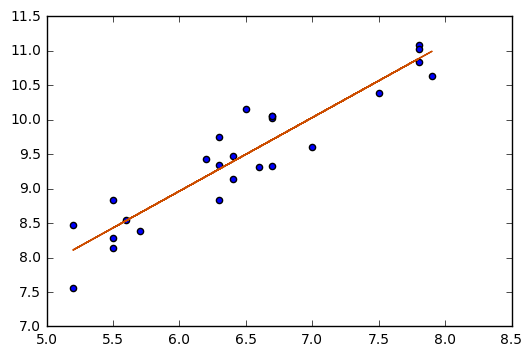

In [96]:
from statsmodels.formula.api import ols

formula = 'value ~ feature_one'
model = ols(formula, df).fit()
print model.summary()

X = df.copy()
X = X.sort(columns='feature_one')
y_pred = model.predict(X)

plt.plot(X['feature_one'], y_pred, c=(0.8, 0.3, 0.0))
plt.scatter(df['feature_one'], df['value'])
plt.show()